## Column Wrangling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sales1 = pd.read_csv(r"D:\Maahin Coding\Coding\Numpy\Exercise B\sales_data1.csv",parse_dates=['Date'])

In [4]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [5]:
sales1['Revenue_Age'] = sales1['Revenue'] / sales1['Customer_Age']
sales1['Revenue_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_Age, dtype: float64

<Axes: ylabel='Density'>

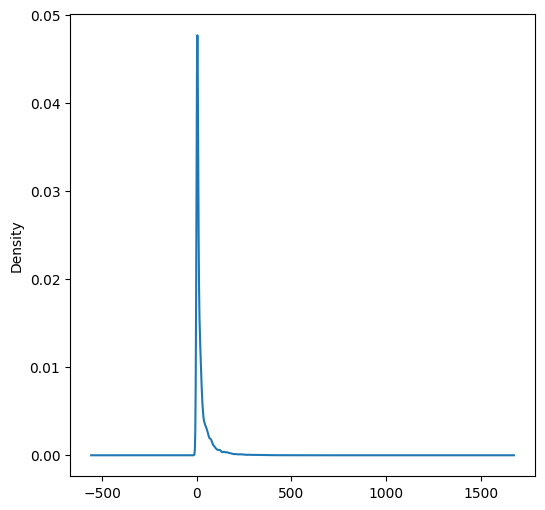

In [6]:
sales1['Revenue_Age'].plot(kind='density',figsize=(6,6))

## Add and calculate a new Calculate_Cost column

In [7]:
sales1['Calculated_Cost'] = sales1['Order_Quantity'] * sales1['Unit_Cost']
sales1['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [8]:
(sales1['Calculated_Cost'] != sales1['Cost']).sum()

0

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

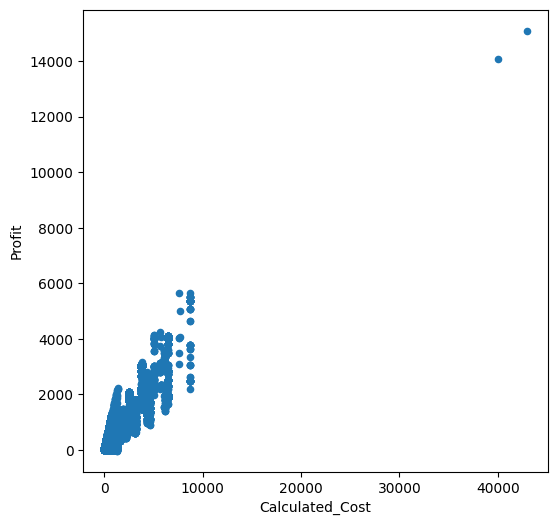

In [9]:
sales1.plot(kind='scatter',x='Calculated_Cost',y='Profit',figsize=(6,6))

Modify all Unit_Price values adding 3% tax to them

In [10]:
sales1['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [12]:
sales1['Unit_Price'] *= 1.03
sales1['Unit_Price'].head()

0    127.308
1    127.308
2    127.308
3    127.308
4    127.308
Name: Unit_Price, dtype: float64

## Selection & Indexing

Get all the sales made in the state of kentucky

In [13]:
sales1.loc[sales1['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_Age,Calculated_Cost
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,127.3080,63,45,108,2.700,45
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,127.3080,63,45,108,2.700,45
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,23.3398,142,96,238,5.950,96
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,23.3398,165,112,277,6.925,112
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,37.1315,537,377,914,22.850,377
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,37.1315,574,403,977,24.425,403
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,31.8270,32,22,54,1.350,22
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,31.8270,336,231,567,14.175,231
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,31.8270,16,11,27,0.675,11
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,31.8270,288,198,486,12.150,198


Get the mean revenue of the Adults (35-64) sales group

In [14]:
sales1.loc[sales1['Age_Group'] == 'Adults (35-64)','Revenue'].mean()

762.8287654055604

In [18]:
sales1.loc[sales1['Age_Group'] == 'Adults (35-64)','Revenue'].describe()

count    55824.000000
mean       762.828765
std       1316.725395
min          2.000000
25%         66.000000
50%        239.000000
75%        832.000000
max      58074.000000
Name: Revenue, dtype: float64